<div style="text-align: center; font-size: 28px; color: #2E86C1;">MILESTONE 1: Data Collection, Exploration, Preprocessing</div>

## Objectives
- Collect, explore, and preprocess historical sales data for analysis and modeling.

## Tasks

### 1. Data Collection
- Acquire historical sales dataset (daily/weekly, retail/e-commerce).
- Include features: sales, date, promotions, holidays, weather.

### 2. Data Exploration
- Perform EDA: trends, seasonality, missing values.
- Summary stats, outliers, patterns (e.g., sales vs. promotions).

### 3. Data Preprocessing
- Handle missing values, duplicates, inconsistencies.
- Add time features: day, month, seasonality, promotions.
- Scale/transform data (e.g., normalization).

# Project Steps & Team Assignments
1. **Notebook outlines & Handling Missing Values** - Assigned to: *Belal Khamis*
2. **Removing Duplicates** - Assigned to: *Marwa Kotb*
3. **Handling Outliers** - Assigned to: *mahmoud sabry*
4. **Standardization and Formatting** - Assigned to: *Mohamed Samy*
5. **Fixing typos and inconsistentencies** - Assigned to: *Hoda Magdy*

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install missingno
!pip install scipy
!pip install scikit-learn 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 01</br></br>Train Data</div>

In [3]:
train = pd.read_csv('train.csv')

# Standardize column names (lowercase and replace spaces with underscores)
train.columns = train.columns.str.lower().str.strip().str.replace(" ", "_")

train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,unnamed:_17
0,73062,2013-02-11,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.010000,NaN
1,73063,2013-02-11,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.010000,NaN
2,73064,2013-02-11,1,BEAUTY,0.00000,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.010000,NaN
3,73065,2013-02-11,1,BEVERAGES,172.00000,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.010000,NaN
4,73066,2013-02-11,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.010000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297885,2015-01-01,25,POULTRY,279.16998,0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,64.077912,NaN
322043,1297886,2015-01-01,25,PREPARED FOODS,121.94100,0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,64.077912,NaN
322044,1297887,2015-01-01,25,PRODUCE,105.00000,0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,64.077912,NaN
322045,1297888,2015-01-01,25,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,64.077912,NaN


In [4]:
train.shape

(322047, 18)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   type_x        322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  transactions  322047 non-null  int64  
 11  type_y        322047 non-null  object 
 12  locale        322047 non-null  object 
 13  locale_name   322047 non-null  object 
 14  description   322047 non-null  object 
 15  transferred   322047 non-null  bool   
 16  dcoilwtico    322047 non-null  float64
 17  unnamed:_17   0 non-null       float64
dtypes: b

In [6]:
train.describe()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,unnamed:_17
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,0.0
mean,1.682979e+06,26.994672,406.383452,3.727136,8.531202,1734.117840,64.077912,NaN
std,7.862493e+05,15.595174,1246.881240,15.512095,4.713809,1050.335018,24.271750,NaN
min,5.610000e+02,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000,NaN
25%,1.010616e+06,13.000000,1.000000,0.000000,4.000000,1030.000000,44.940000,NaN
50%,1.842406e+06,27.000000,19.000000,0.000000,9.000000,1409.000000,52.720000,NaN
75%,2.209556e+06,40.000000,241.260505,1.000000,13.000000,2148.000000,93.120000,NaN
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000,NaN


In [7]:
train['date'] = pd.to_datetime(train['date'], errors='coerce')

In [8]:
train['transferred'].value_counts()

transferred
False    308352
True      13695
Name: count, dtype: int64

In [9]:
print(train.nunique())

id              292545
date               179
store_nbr           54
family              33
sales            56108
onpromotion        285
city                22
state               16
type_x               5
cluster             17
transactions      3097
type_y               5
locale               3
locale_name         24
description         80
transferred          2
dcoilwtico         164
unnamed:_17          0
dtype: int64


In [10]:
#for column in train.select_dtypes(include=['object']).columns:
 #   try:
        
  #      train[column] = pd.to_numeric(train[column], errors='coerce')  
   # except ValueError:
    #    pass
#max_values = train.max()
#print(max_values)

In [11]:
train = train.drop(columns=['unnamed:_17'])
train.shape

(322047, 17)

In [12]:
train.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
transactions    0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64

<Axes: >

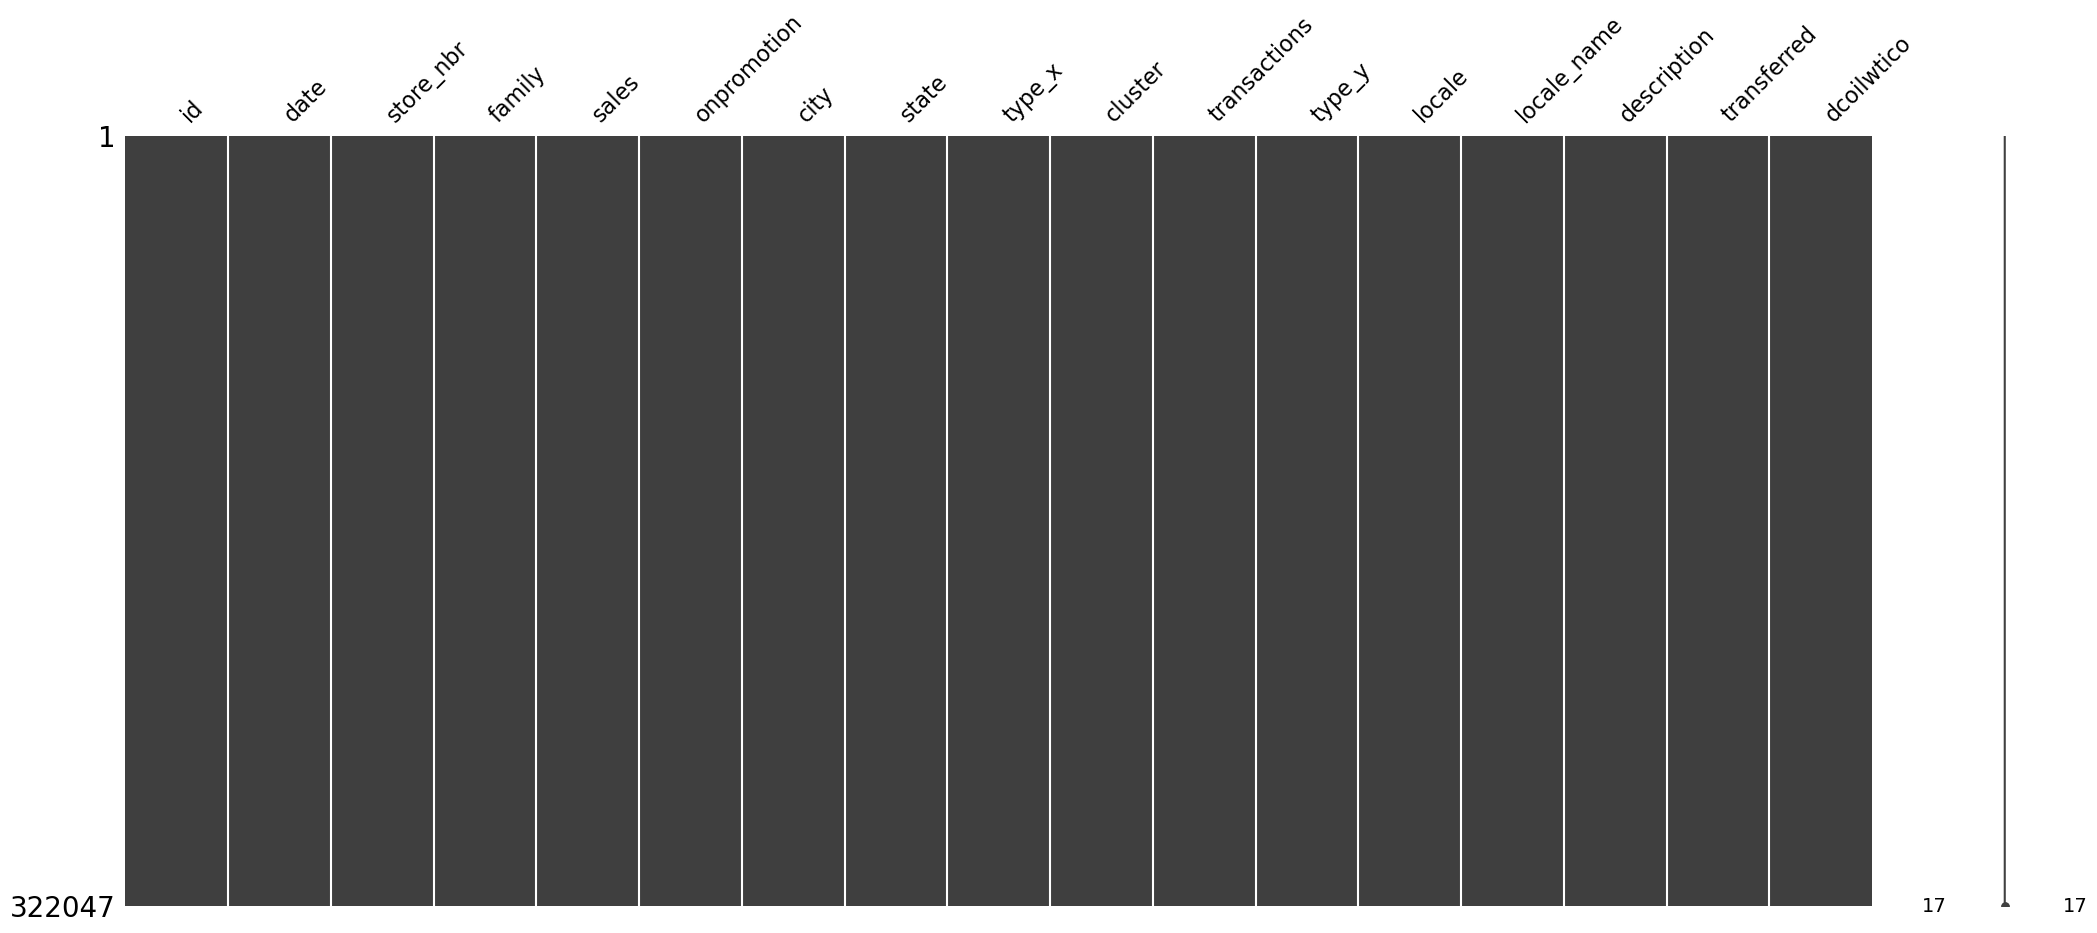

In [13]:
msno.matrix(train)

In [14]:
train.duplicated().sum()

train = train.drop_duplicates()

train.duplicated().sum()


0

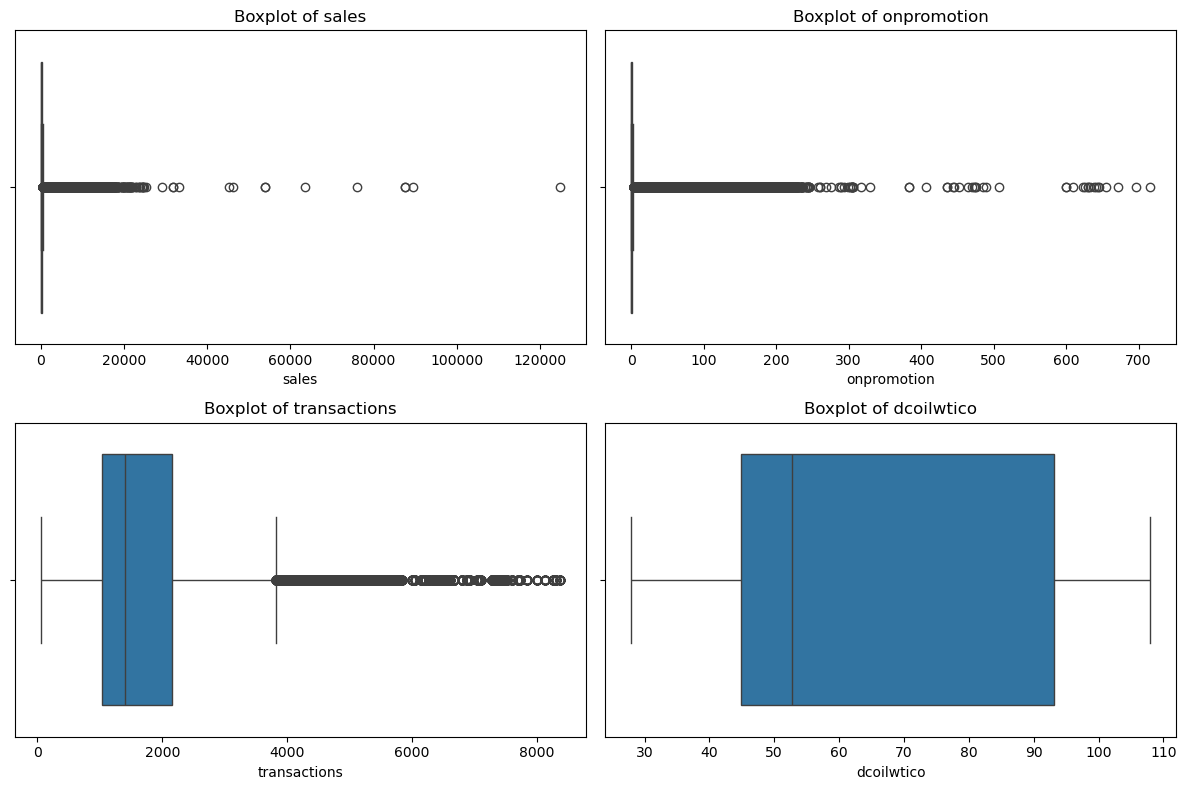

In [15]:
numeric_cols = ["sales", "onpromotion", "transactions", "dcoilwtico"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[col] )
    plt.title(f"Boxplot of {col}")



plt.tight_layout()

plt.show()


In [16]:
outliers_iqr = {}
outliers_zscore = {}

for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    z_scores = zscore(train[col])
    outliers_zscore[col] = train[abs(z_scores) > 3][col]

In [17]:
for col in numeric_cols:
    print(f"{col}: IQR Outliers = {len(outliers_iqr[col])}, Z-score Outliers = {len(outliers_zscore[col])}")

sales: IQR Outliers = 46761, Z-score Outliers = 6466
onpromotion: IQR Outliers = 50032, Z-score Outliers = 5939
transactions: IQR Outliers = 15411, Z-score Outliers = 5511
dcoilwtico: IQR Outliers = 0, Z-score Outliers = 0


In [18]:
def remove_outliers_iqr(train, columns):
    df_clean = train.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [19]:
train_removed = remove_outliers_iqr(train, ["sales", "onpromotion", "transactions"])
print(f"After removing outliers: {train_removed.shape[0]} rows")

After removing outliers: 212892 rows


In [20]:
def replace_outliers_with_median(df, columns):
    train_fixed = train.copy()
    for col in columns:
        Q1 = train_fixed[col].quantile(0.25)
        Q3 = train_fixed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = train_fixed[col].median()
        train_fixed[col] = train_fixed[col].apply(lambda x: median_value if (x < lower_bound or x > upper_bound) else x)
    return train_fixed

In [21]:
train_replaced = replace_outliers_with_median(train, ["sales", "onpromotion", "transactions"])
print(f"After replacing outliers with median: {train_replaced.shape[0]} rows")

After replacing outliers with median: 322047 rows


# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 02</br></br>Test Data</div>

In [22]:
test = pd.read_csv('test.csv')

# Standardize column names (lowercase and replace spaces with underscores)
test.columns = test.columns.str.lower().str.strip().str.replace(" ", "_")

test

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,3015144,24-08-2017,1,Tools,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
1,3015145,24-08-2017,1,LifeStyle,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
2,3015146,24-08-2017,1,LifeStyle,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
3,3015147,24-08-2017,1,BEVERAGES,26,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
4,3015148,24-08-2017,1,LifeStyle,0,Quito,Pichincha,D,13,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,3016921,24-08-2017,9,POULTRY,0,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
1778,3016922,24-08-2017,9,PREPARED FOODS,0,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
1779,3016923,24-08-2017,9,PRODUCE,3,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24
1780,3016924,24-08-2017,9,Home,9,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,47.24


In [23]:
test.shape

(1782, 15)

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1782 non-null   int64  
 1   date         1782 non-null   object 
 2   store_nbr    1782 non-null   int64  
 3   family       1782 non-null   object 
 4   onpromotion  1782 non-null   int64  
 5   city         1782 non-null   object 
 6   state        1782 non-null   object 
 7   type_x       1782 non-null   object 
 8   cluster      1782 non-null   int64  
 9   type_y       1782 non-null   object 
 10  locale       1782 non-null   object 
 11  locale_name  1782 non-null   object 
 12  description  1782 non-null   object 
 13  transferred  1782 non-null   bool   
 14  dcoilwtico   1782 non-null   float64
dtypes: bool(1), float64(1), int64(4), object(9)
memory usage: 196.8+ KB


In [25]:
test.describe()

,id,store_nbr,onpromotion,cluster,dcoilwtico
count,1.782000e+03,1782.000000,1782.000000,1782.000000,1.782000e+03
mean,3.016034e+06,27.500000,4.639731,8.481481,4.724000e+01
std,5.145634e+02,15.590159,10.558856,4.651039,7.107422e-15
min,3.015144e+06,1.000000,0.000000,1.000000,4.724000e+01
25%,3.015589e+06,14.000000,0.000000,4.000000,4.724000e+01
50%,3.016034e+06,27.500000,0.000000,8.500000,4.724000e+01
75%,3.016480e+06,41.000000,4.000000,13.000000,4.724000e+01
max,3.016925e+06,54.000000,68.000000,17.000000,4.724000e+01


In [26]:
test['date'] = pd.to_datetime(test['date'], errors='coerce', format='%d-%m-%Y')

In [27]:
test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
city           0
state          0
type_x         0
cluster        0
type_y         0
locale         0
locale_name    0
description    0
transferred    0
dcoilwtico     0
dtype: int64

<Axes: >

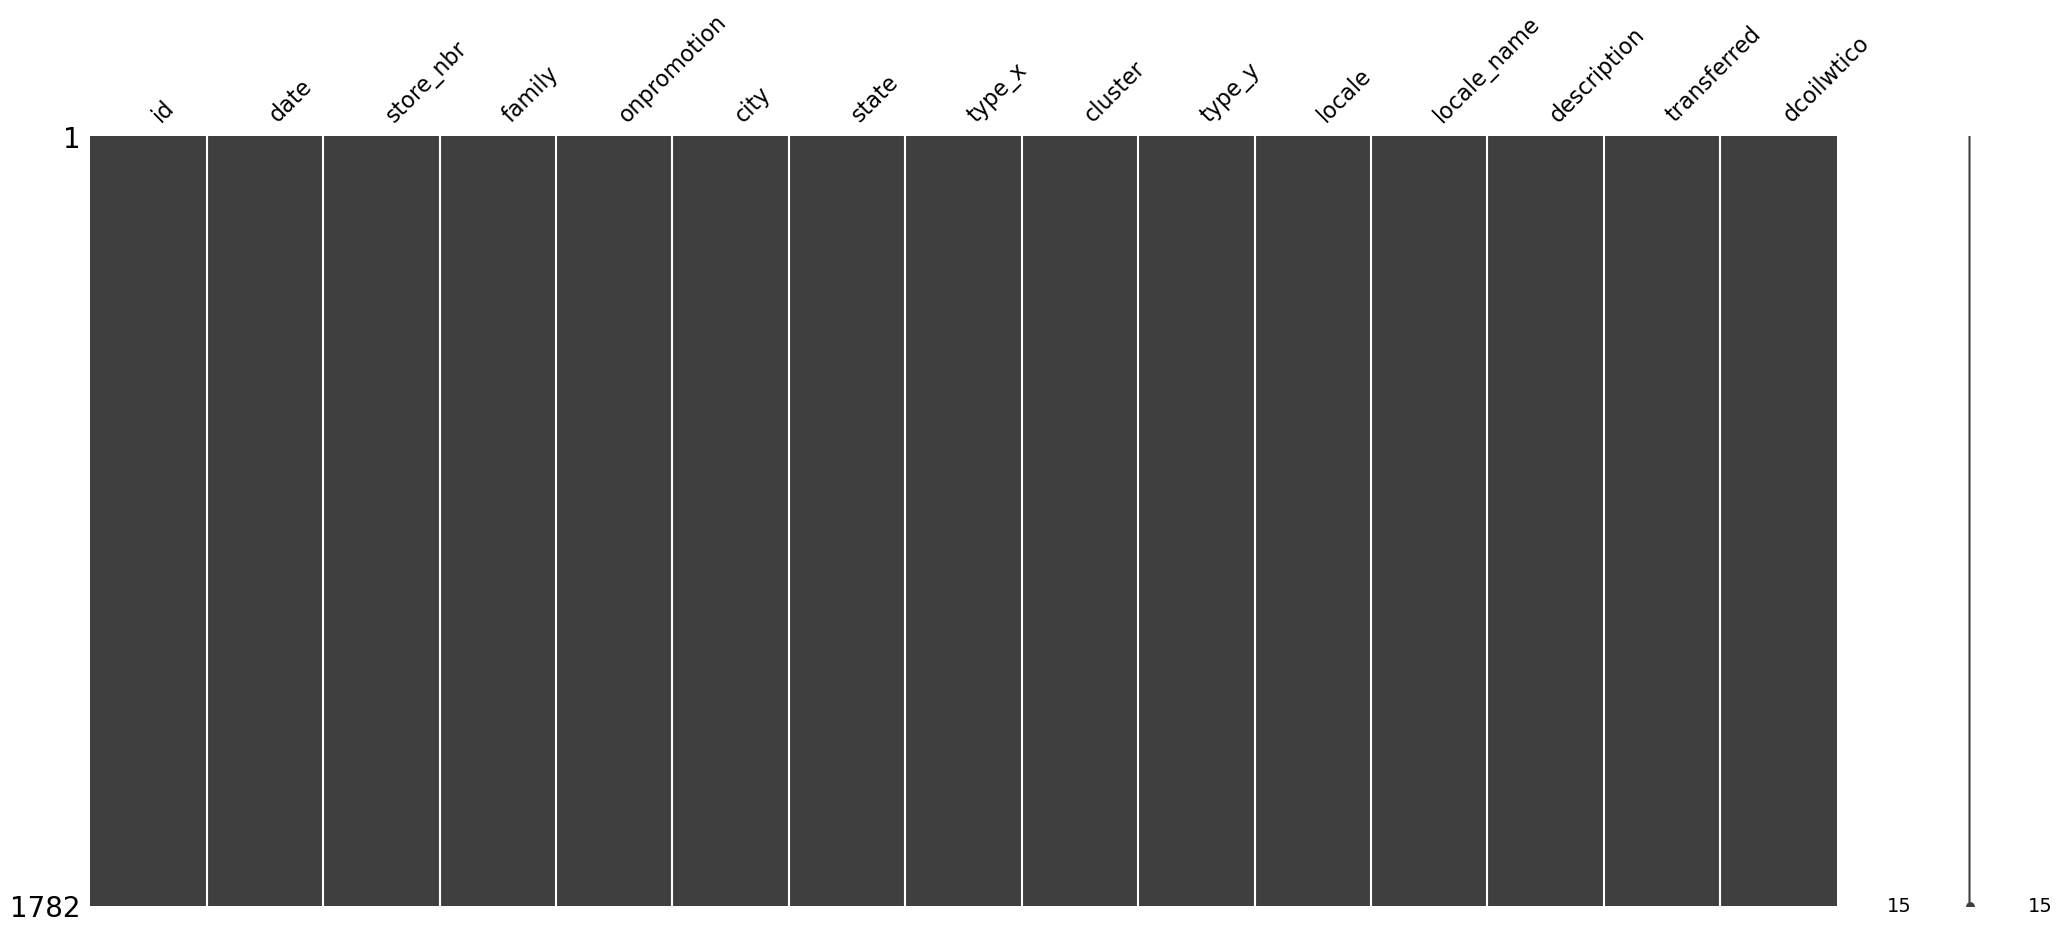

In [28]:
msno.matrix(test)

In [29]:

test.duplicated().sum()

test = test.drop_duplicates()

test.duplicated().sum()


0

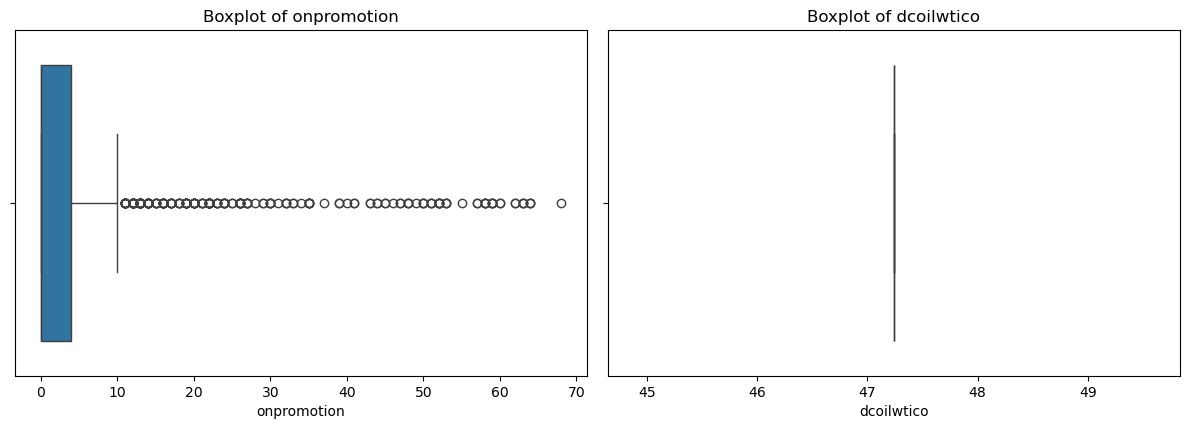

In [30]:
numeric_cols2 = ["onpromotion", "dcoilwtico"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols2, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=test[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [31]:
# Use only columns present in test
common_cols = [col for col in numeric_cols if col in test.columns]

for col in common_cols:
    # Calculate IQR outliers
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = test[(test[col] < lower_bound) | (test[col] > upper_bound)][col]
    
    # Check variance before z-score calculation
    if test[col].std() < 1e-6:
        print(f"Skipping z-score for {col} due to low variance.")
        outliers_zscore[col] = pd.Series(dtype=test[col].dtype)
    else:
        z_scores = zscore(test[col])
        outliers_zscore[col] = test[abs(z_scores) > 3][col]

Skipping z-score for dcoilwtico due to low variance.


In [32]:
for col in numeric_cols2:
    print(f"{col}: IQR Outliers = {len(outliers_iqr[col])}, Z-score Outliers = {len(outliers_zscore[col])}")

onpromotion: IQR Outliers = 245, Z-score Outliers = 55
dcoilwtico: IQR Outliers = 0, Z-score Outliers = 0


In [33]:
def remove_outliers_iqr(train, columns):
    test_clean = test.copy()
    for col in columns:
        Q1 = test_clean[col].quantile(0.25)
        Q3 = test_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        test_clean = test_clean[(test_clean[col] >= lower_bound) & (test_clean[col] <= upper_bound)]
    return test_clean

In [34]:
test_removed = remove_outliers_iqr(test, ["onpromotion"])
print(f"After removing outliers: {test_removed.shape[0]} rows")

After removing outliers: 1537 rows


In [35]:
def replace_outliers_with_median(df, columns):
    df_fixed = train.copy()
    for col in columns:
        Q1 = df_fixed[col].quantile(0.25)
        Q3 = df_fixed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df_fixed[col].median()
        df_fixed[col] = df_fixed[col].apply(lambda x: median_value if (x < lower_bound or x > upper_bound) else x)
    return df_fixed

In [36]:
test_replaced = replace_outliers_with_median(train, ["onpromotion"])
print(f"After replacing outliers with median: {test_replaced.shape[0]} rows")

After replacing outliers with median: 322047 rows


# <div  style="text-align:center;border-radius:2px;padding:8px;background-color:#000000;color:#F;font-family:'Times-new-roman'">PART 03</br></br>Standardization techniques applied to both the train and test datasets</div>

In [37]:
# Convert categorical columns to category dtype
categorical_cols = ["store_nbr", "family", "city", "state", "type", "cluster", "transferred"]
for col in categorical_cols:
    if col in train.columns:
        train[col] = train[col].astype("category")
    if col in test.columns:
        test[col] = test[col].astype("category")

# Ensure numeric columns are float/int
numeric_cols = ["sales", "onpromotion", "transactions", "dcoilwtico"]
for col in numeric_cols:
    if col in train.columns:
        train[col] = pd.to_numeric(train[col], errors="coerce")
    if col in test.columns:
        test[col] = pd.to_numeric(test[col], errors="coerce")


In [38]:
# Extract time-based features
for df in [train, test]:
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["weekday"] = df["date"].dt.weekday
    df["week"] = df["date"].dt.isocalendar().week
    df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Saturday/Sunday


# Apply Standardization/Scaling to train and test

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Select numeric columns (excluding 'sales' from train)
numeric_cols = ["onpromotion", "transferred", "dcoilwtico"]
train_scaled = train.copy()
test_scaled = test.copy()

# Apply scaling
train_scaled[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test_scaled[numeric_cols] = scaler.transform(test[numeric_cols])  # Use transform, NOT fit_transform

In [40]:
# Get only common columns present in both datasets
common_columns = list(set(train_scaled.columns) & set(test_scaled.columns))

# Reorder test_scaled based on train_scaled (excluding 'sales' if present)
test_scaled = test_scaled[common_columns]
train_scaled = train_scaled[common_columns + ["sales"]]  # Ensure 'sales' stays in train

# Check if they are now aligned
print("Aligned Train Columns:", train_scaled.columns.tolist())
print("Aligned Test Columns:", test_scaled.columns.tolist())


Aligned Train Columns: ['year', 'onpromotion', 'date', 'city', 'cluster', 'store_nbr', 'type_x', 'locale_name', 'type_y', 'is_weekend', 'family', 'id', 'dcoilwtico', 'description', 'state', 'day', 'transferred', 'month', 'weekday', 'week', 'locale', 'sales']
Aligned Test Columns: ['year', 'onpromotion', 'date', 'city', 'cluster', 'store_nbr', 'type_x', 'locale_name', 'type_y', 'is_weekend', 'family', 'id', 'dcoilwtico', 'description', 'state', 'day', 'transferred', 'month', 'weekday', 'week', 'locale']


In [41]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,locale_name,description,transferred,dcoilwtico,year,month,day,weekday,week,is_weekend
0,73062,2013-02-11,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
1,73063,2013-02-11,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
2,73064,2013-02-11,1,BEAUTY,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
3,73065,2013-02-11,1,BEVERAGES,172.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
4,73066,2013-02-11,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297885,2015-01-01,25,POULTRY,279.16998,0,Salinas,Santa Elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0
322043,1297886,2015-01-01,25,PREPARED FOODS,121.94100,0,Salinas,Santa Elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0
322044,1297887,2015-01-01,25,PRODUCE,105.00000,0,Salinas,Santa Elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0
322045,1297888,2015-01-01,25,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Salinas,Santa Elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  category      
 3   family        322047 non-null  category      
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   city          322047 non-null  category      
 7   state         322047 non-null  category      
 8   type_x        322047 non-null  object        
 9   cluster       322047 non-null  category      
 10  transactions  322047 non-null  int64         
 11  type_y        322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

In [43]:
lst= ["family", "city", "state",  "type_y", "locale", "locale_name", "description", "transferred"]
for i in lst:
    print(i," : ",train[i].unique())


family  :  ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', ..., 'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']
Length: 33
Categories (33, object): ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', ..., 'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']
city  :  ['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra', ..., 'Esmeraldas', 'El Carmen', 'Libertad', 'Manta', 'Puyo']
Length: 22
Categories (22, object): ['Ambato', 'Babahoyo', 'Cayambe', 'Cuenca', ..., 'Quito', 'Riobamba', 'Salinas', 'Santo Domingo']
state  :  ['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura', 'Santo Domingo de los Tsachilas', ..., 'Loja', 'El Oro', 'Esmeraldas', 'Manabi', 'Pastaza']
Length: 16
Categories (16, object): ['Azuay', 'Bolivar', 'Chimborazo', 'Cotopaxi', ..., 'Pichincha', 'Santa Elena', 'Santo Domingo de los Tsachilas', 'Tungurahua']
type_y  :  ['Holiday' 'Additional' 'Transfer' 'Event' 'Bridge']
locale  :  ['National' 'Regional' 'Loca

In [44]:
columns_to_clean = ["family", "city", "state", "cluster", "type_y", "locale", "locale_name", "description", "transferred"]
def clean_text(text):
    if isinstance(text, str):
        return text.strip().capitalize()
    return text

train[columns_to_clean] = train[columns_to_clean].applymap(clean_text)
corrections = {
    "fundacion de guayaquil-1": "fundacion de guayaquil",
    "santo domingo de los tsachilas": "santo domingo",
}

train["description"] = train["description"].apply(lambda x: corrections.get(x, x))
train["locale_name"] = train["locale_name"].apply(lambda x: corrections.get(x, x))

C:\Users\user\AppData\Local\Temp\ipykernel_23460\4103802521.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train[columns_to_clean] = train[columns_to_clean].applymap(clean_text)


In [45]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,locale_name,description,transferred,dcoilwtico,year,month,day,weekday,week,is_weekend
0,73062,2013-02-11,1,Automotive,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
1,73063,2013-02-11,1,Baby care,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
2,73064,2013-02-11,1,Beauty,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
3,73065,2013-02-11,1,Beverages,172.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
4,73066,2013-02-11,1,Books,0.00000,0,Quito,Pichincha,D,13,...,Ecuador,Carnaval,False,97.010000,2013,2,11,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297885,2015-01-01,25,Poultry,279.16998,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0
322043,1297886,2015-01-01,25,Prepared foods,121.94100,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0
322044,1297887,2015-01-01,25,Produce,105.00000,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0
322045,1297888,2015-01-01,25,School and office supplies,0.00000,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2015,1,1,3,1,0


In [46]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  category      
 3   family        322047 non-null  category      
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   city          322047 non-null  category      
 7   state         322047 non-null  category      
 8   type_x        322047 non-null  object        
 9   cluster       322047 non-null  category      
 10  transactions  322047 non-null  int64         
 11  type_y        322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

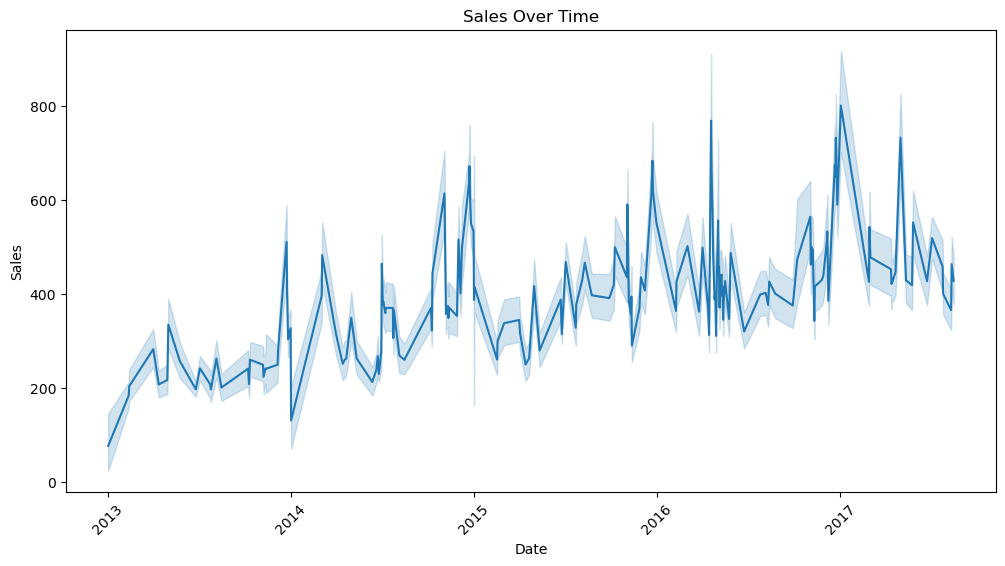

In [47]:
if "date" in train.columns:
    train["date"] = pd.to_datetime(train["date"]) 
    train = train.sort_values(by="date") 

    plt.figure(figsize=(12,6))
    sns.lineplot(x=train["date"], y=train["sales"])
    plt.title("Sales Over Time")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()
# The line plot displays how sales change over time.

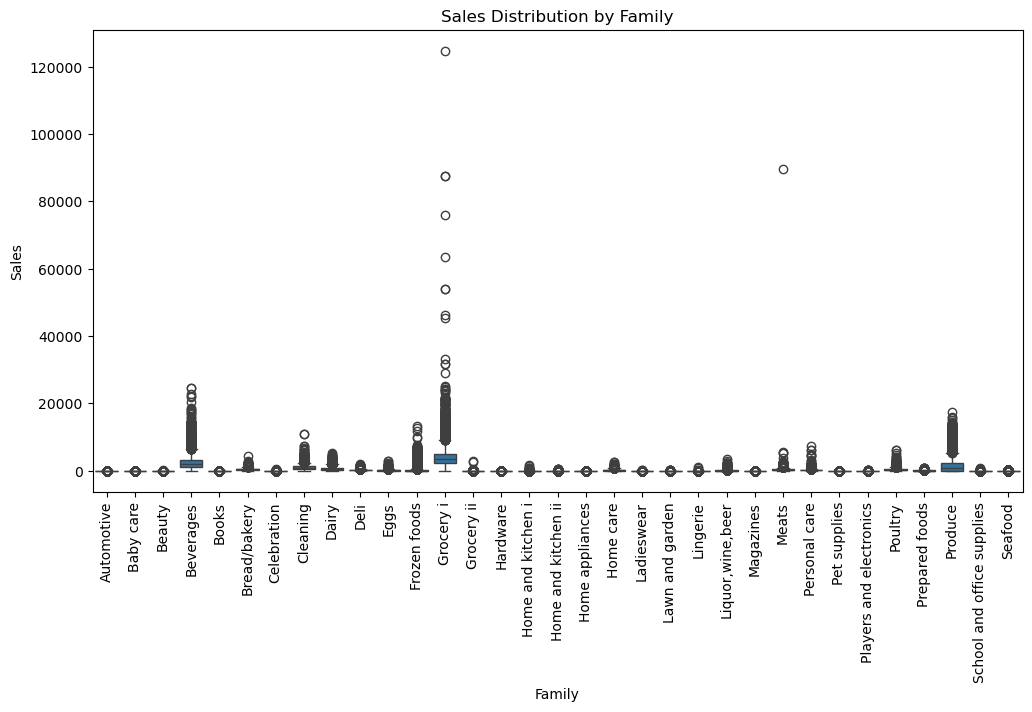

In [48]:
if "family" in train.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=train, x="family", y="sales")
    plt.title("Sales Distribution by Family")
    plt.xlabel("Family")
    plt.ylabel("Sales")
    plt.xticks(rotation=90)
    plt.show()
# The bar plot compares the total sales across different product families or categories.

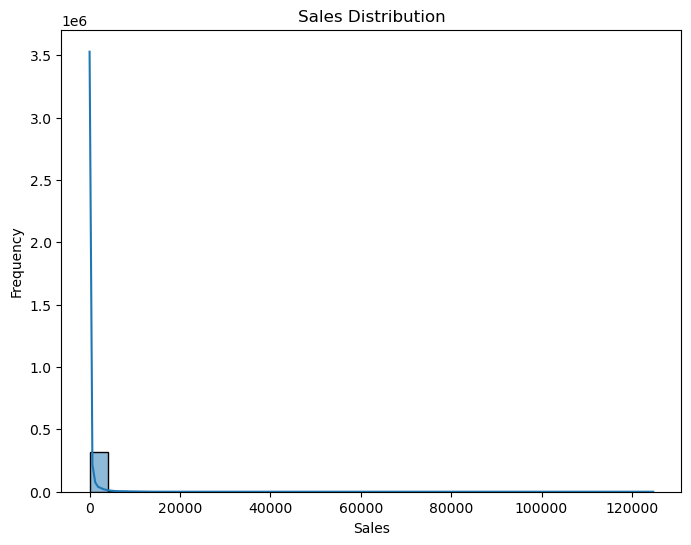

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(train["sales"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()
# The histogram illustrates the frequency distribution of sales values.

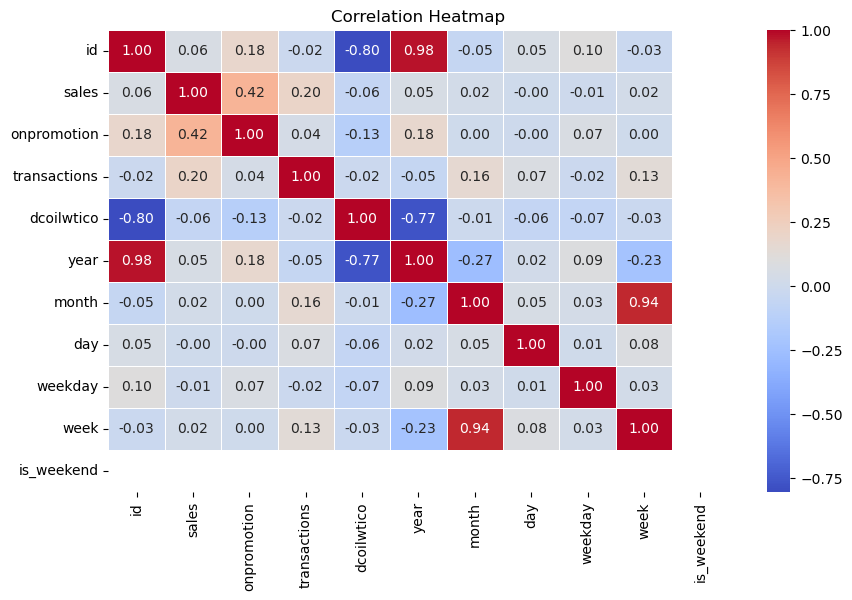

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(train.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# This heatmap shows how numeric variables in your dataset are related

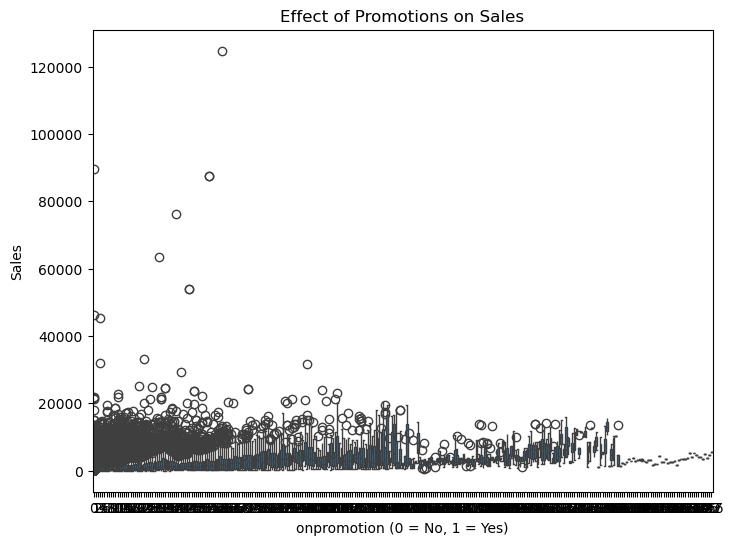

In [51]:
if "onpromotion" in train.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=train, x="onpromotion", y="sales")
    plt.title("Effect of Promotions on Sales")
    plt.xlabel("onpromotion (0 = No, 1 = Yes)")
    plt.ylabel("Sales")
    plt.show()
    # the distribution of sales based on promotion status

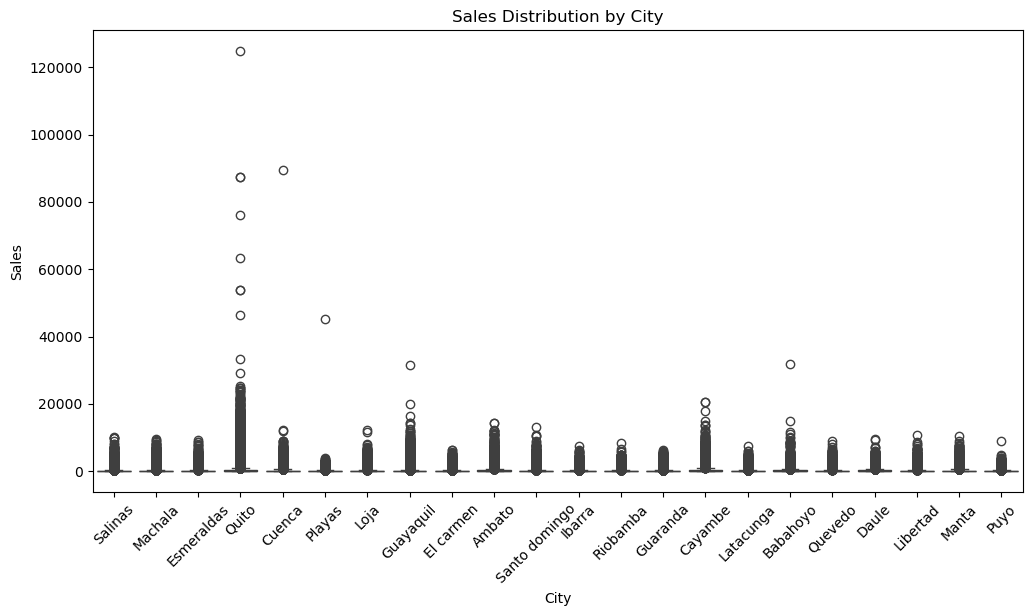

In [52]:
if "city" in train.columns:
    train["city"] = train["city"].astype(str)  
    plt.figure(figsize=(12,6))
    sns.boxplot(data=train, x="city", y="sales")
    plt.title("Sales Distribution by City")
    plt.xlabel("City")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()

# the distribution of sales for each city

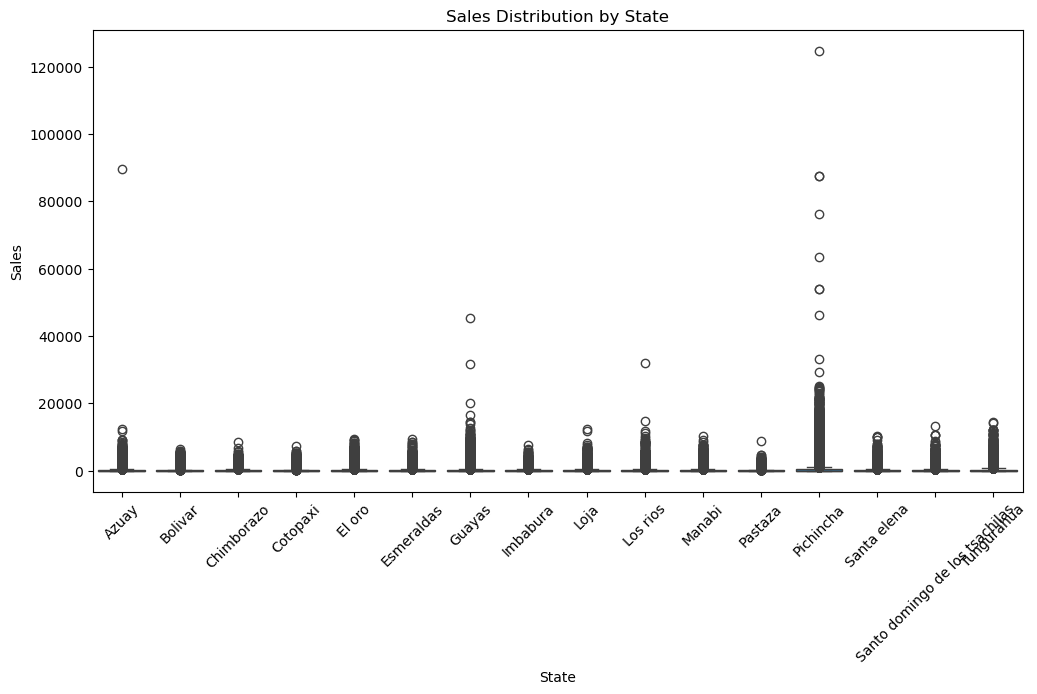

In [53]:
if "state" in train.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=train, x="state", y="sales")
    plt.title("Sales Distribution by State")
    plt.xlabel("State")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()


# the distribution of sales for each state

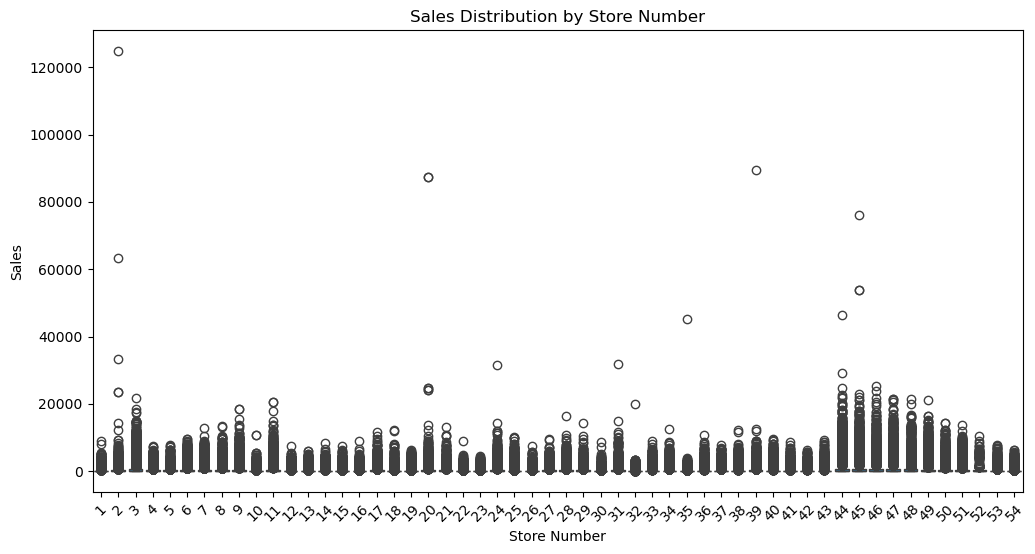

In [54]:
if "store_nbr" in train.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=train, x="store_nbr", y="sales")
    plt.title("Sales Distribution by Store Number")
    plt.xlabel("Store Number")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()

# the distribution of sales for each store

In [55]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,locale_name,description,transferred,dcoilwtico,year,month,day,weekday,week,is_weekend
321942,588,2013-01-01,25,Players and electronics,0.0,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2013,1,1,1,1,0
321915,561,2013-01-01,25,Automotive,0.0,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2013,1,1,1,1,0
321947,593,2013-01-01,25,Seafood,0.0,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2013,1,1,1,1,0
321946,592,2013-01-01,25,School and office supplies,0.0,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2013,1,1,1,1,0
321945,591,2013-01-01,25,Produce,0.0,0,Salinas,Santa elena,D,1,...,Ecuador,Primer dia del ano,False,64.077912,2013,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320764,2999737,2017-08-15,27,Books,0.0,0,Daule,Guayas,D,1,...,Riobamba,Fundacion de riobamba,False,47.570000,2017,8,15,1,33,0
320763,2999736,2017-08-15,27,Beverages,2877.0,10,Daule,Guayas,D,1,...,Riobamba,Fundacion de riobamba,False,47.570000,2017,8,15,1,33,0
320762,2999735,2017-08-15,27,Beauty,3.0,0,Daule,Guayas,D,1,...,Riobamba,Fundacion de riobamba,False,47.570000,2017,8,15,1,33,0
320774,2999747,2017-08-15,27,Hardware,7.0,0,Daule,Guayas,D,1,...,Riobamba,Fundacion de riobamba,False,47.570000,2017,8,15,1,33,0


# <div  style="text-align:center;border-radius:2px;padding:8px;background-color:#000000;color:#F;font-family:'Times-new-roman'">PART 04</br></br>Feature Engineering</div>

In [56]:
# Multiply sales by promotion indicator
train['sales_onpromo'] = train['sales'] * train['onpromotion']

In [57]:
# For 'city'
city_means = train.groupby('city')['sales'].mean().to_dict()
train['city_encoded'] = train['city'].map(city_means)
test['city_encoded'] = test['city'].map(city_means)

# For 'state'
state_means = train.groupby('state')['sales'].mean().to_dict()
train['state_encoded'] = train['state'].map(state_means)
test['state_encoded'] = test['state'].map(state_means)

C:\Users\user\AppData\Local\Temp\ipykernel_23460\2903057126.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_means = train.groupby('state')['sales'].mean().to_dict()


In [58]:
# Average sales per store and month
train['avg_sales_store_month'] = train.groupby(['store_nbr', 'month'])['sales'].transform('mean')

C:\Users\user\AppData\Local\Temp\ipykernel_23460\518993463.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train['avg_sales_store_month'] = train.groupby(['store_nbr', 'month'])['sales'].transform('mean')


In [59]:
family_freq = train['family'].value_counts(normalize=True).to_dict()
train['family_encoded'] = train['family'].map(family_freq)
test['family_encoded'] = test['family'].map(family_freq)

In [60]:
# Frequency encoding for 'locale_name'
locale_freq = train['locale_name'].value_counts(normalize=True).to_dict()
train['locale_name_encoded'] = train['locale_name'].map(locale_freq)

In [61]:
train['is_holiday'] = train['description'].str.contains('Holiday|Navidad', case=False).astype(int)
test['is_holiday'] = test['description'].str.contains('Holiday|Navidad', case=False).astype(int)

In [62]:
locale_order = {'National': 2, 'Regional': 1, 'Local': 0}
train['locale_encoded'] = train['locale'].map(locale_order)
test['locale_encoded'] = test['locale'].map(locale_order)

In [63]:
train[['transferred', 'is_weekend']] = train[['transferred', 'is_weekend']].astype(int)

In [64]:
type_y_order = {'Holiday': 2, 'Event': 1, 'Bridge': 0}
train['type_y_encoded'] = train['type_y'].map(type_y_order)
test['type_y_encoded'] = test['type_y'].map(type_y_order)

In [65]:
binary_cols = ['transferred', 'is_weekend', 'is_holiday']
train[binary_cols] = train[binary_cols].astype(int)
test[binary_cols] = test[binary_cols].astype(int)

In [66]:
# Calculate quartiles
q25 = train['dcoilwtico'].quantile(0.25)
q75 = train['dcoilwtico'].quantile(0.75)

# Ensure unique bin edges
if q25 == q75:
    bins = [-np.inf, q25, np.inf]
    labels = ['low', 'high']  # Adjust labels accordingly
else:
    bins = [-np.inf, q25, q75, np.inf]
    labels = ['low', 'medium', 'high']

# Bin into categories
train['dcoilwtico_bin'] = pd.cut(
    train['dcoilwtico'],
    bins=bins,
    labels=labels
)

In [71]:
train['season'] = pd.cut(
    train['month'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

In [72]:
# Multiply promotion count by weekend flag (0 or 1)
train['promo_weekend'] = train['onpromotion'] * train['is_weekend']

In [73]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'transactions', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'dcoilwtico', 'year',
       'month', 'day', 'weekday', 'week', 'is_weekend', 'sales_onpromo',
       'city_encoded', 'state_encoded', 'avg_sales_store_month',
       'family_encoded', 'locale_name_encoded', 'is_holiday', 'locale_encoded',
       'type_y_encoded', 'dcoilwtico_bin', 'season', 'promo_weekend'],
      dtype='object')

In [74]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,state_encoded,avg_sales_store_month,family_encoded,locale_name_encoded,is_holiday,locale_encoded,type_y_encoded,dcoilwtico_bin,season,promo_weekend
321942,588,2013-01-01,25,Players and electronics,0.0,0,Salinas,Santa elena,D,1,...,269.214030,336.347602,0.030303,0.499027,0,2,2.0,medium,Q1,0
321915,561,2013-01-01,25,Automotive,0.0,0,Salinas,Santa elena,D,1,...,269.214030,336.347602,0.030303,0.499027,0,2,2.0,medium,Q1,0
321947,593,2013-01-01,25,Seafood,0.0,0,Salinas,Santa elena,D,1,...,269.214030,336.347602,0.030303,0.499027,0,2,2.0,medium,Q1,0
321946,592,2013-01-01,25,School and office supplies,0.0,0,Salinas,Santa elena,D,1,...,269.214030,336.347602,0.030303,0.499027,0,2,2.0,medium,Q1,0
321945,591,2013-01-01,25,Produce,0.0,0,Salinas,Santa elena,D,1,...,269.214030,336.347602,0.030303,0.499027,0,2,2.0,medium,Q1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320764,2999737,2017-08-15,27,Books,0.0,0,Daule,Guayas,D,1,...,305.689744,369.520863,0.030303,0.041193,0,0,2.0,medium,Q3,0
320763,2999736,2017-08-15,27,Beverages,2877.0,10,Daule,Guayas,D,1,...,305.689744,369.520863,0.030303,0.041193,0,0,2.0,medium,Q3,0
320762,2999735,2017-08-15,27,Beauty,3.0,0,Daule,Guayas,D,1,...,305.689744,369.520863,0.030303,0.041193,0,0,2.0,medium,Q3,0
320774,2999747,2017-08-15,27,Hardware,7.0,0,Daule,Guayas,D,1,...,305.689744,369.520863,0.030303,0.041193,0,0,2.0,medium,Q3,0
